# Recommendation Systems

In [1]:
import pandas as pd
import scipy
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
import itertools as it

In [3]:
list(it.combinations([1, 2, 4], r = 2))

[(1, 2), (1, 4), (2, 4)]

In [4]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.drop('timestamp', axis = 1, inplace = True)
movies.drop('genres', axis = 1, inplace = True)

In [7]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
df = pd.merge(ratings, movies, on = 'movieId')

In [10]:
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [11]:
df.to_csv('data/merged_movies.csv')

In [12]:
#item based
item_df = pd.pivot_table(df, index='title', columns = 'userId', values = 'rating')
user_df = pd.pivot_table(df, index = 'userId', columns = 'title', values = 'rating')

In [13]:
item_df.fillna(0).head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
user_df.fillna(0).head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
item_df.shape

(9719, 610)

In [16]:
sparse_items = scipy.sparse.csr_matrix(item_df.fillna(0))

In [17]:
print(sparse_items)

  (0, 609)	4.0
  (1, 331)	4.0
  (2, 331)	3.5
  (2, 376)	3.5
  (3, 344)	5.0
  (4, 112)	3.0
  (4, 344)	5.0
  (5, 20)	1.5
  (6, 11)	5.0
  (6, 18)	2.0
  (6, 90)	2.0
  (6, 94)	3.0
  (6, 171)	4.0
  (6, 216)	4.0
  (6, 287)	3.0
  (6, 293)	1.0
  (6, 306)	3.5
  (6, 376)	3.5
  (6, 413)	3.0
  (6, 473)	1.0
  (6, 476)	3.5
  (6, 519)	4.0
  (6, 554)	5.0
  (6, 560)	4.5
  (6, 598)	2.0
  :	:
  (9717, 26)	5.0
  (9717, 41)	5.0
  (9717, 56)	2.0
  (9717, 67)	4.0
  (9717, 87)	3.5
  (9717, 140)	3.5
  (9717, 197)	2.0
  (9717, 214)	2.5
  (9717, 216)	2.0
  (9717, 220)	3.5
  (9717, 238)	3.0
  (9717, 281)	4.0
  (9717, 293)	4.0
  (9717, 306)	2.5
  (9717, 312)	1.0
  (9717, 413)	3.0
  (9717, 420)	3.0
  (9717, 447)	3.0
  (9717, 473)	3.0
  (9717, 476)	3.5
  (9717, 554)	3.0
  (9717, 560)	4.0
  (9717, 596)	3.0
  (9717, 598)	2.5
  (9718, 526)	1.0


In [18]:
recommender = pairwise_distances(sparse_items, metric = 'cosine')

In [19]:
rdf = pd.DataFrame(recommender, columns = item_df.index, index = item_df.index)

In [20]:
rdf.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,0.858347,1.0,...,1.0,0.657945,0.456695,0.292893,1.0,1.0,0.860569,0.672673,1.0,1.0
'Hellboy': The Seeds of Creation (2004),1.0,0.000000,0.292893,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Round Midnight (1986),1.0,0.292893,0.000000,1.000000,1.000000,1.0,0.823223,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Salem's Lot (2004),1.0,1.000000,1.000000,0.000000,0.142507,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Til There Was You (1997),1.0,1.000000,1.000000,0.142507,0.000000,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0


In [21]:
search = 'Die Hard'

In [22]:
movies.loc[movies['title'].str.contains(search), 'title']

138     Die Hard: With a Vengeance (1995)
793                       Die Hard (1988)
1053                    Die Hard 2 (1990)
6518         Live Free or Die Hard (2007)
8103       Good Day to Die Hard, A (2013)
Name: title, dtype: object

In [23]:
item_df.head(2)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
item_df.loc['Live Free or Die Hard (2007)', :].mean()

3.40625

In [25]:
item_df.T['Live Free or Die Hard (2007)'].count()

32

In [26]:
def recommender(title, n):
    return pd.DataFrame(rdf[title].sort_values()[1:n+1])

In [27]:
recommender('Live Free or Die Hard (2007)', 5)

,Live Free or Die Hard (2007)
title,
Transformers (2007),0.464709
King Kong (2005),0.472095
Phone Booth (2002),0.489301
Indiana Jones and the Kingdom of the Crystal Skull (2008),0.492294
"Day After Tomorrow, The (2004)",0.499540


In [28]:
import numpy as np

In [29]:
recommender(rdf.columns[np.random.randint(0, rdf.shape[1])], 7)

,Royal Flash (1975)
title,
Massu Engira Maasilamani (2015),0.0
Down Argentine Way (1940),0.0
Golmaal (2006),0.0
A Perfect Day (2015),0.0
Hood of Horror (2006),0.0
Siam Sunset (1999),0.0
"Honey, We Shrunk Ourselves (1997)",0.0


In [30]:
rdf.loc[:, 'Die Hard: With a Vengeance (1995)'].nsmallest(10)

title
Die Hard: With a Vengeance (1995)    0.000000
True Lies (1994)                     0.341742
Speed (1994)                         0.365913
Cliffhanger (1993)                   0.377932
Ace Ventura: Pet Detective (1994)    0.381457
GoldenEye (1995)                     0.384206
Clear and Present Danger (1994)      0.399911
Fugitive, The (1993)                 0.408297
Batman (1989)                        0.413284
Outbreak (1995)                      0.423053
Name: Die Hard: With a Vengeance (1995), dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId     100836 non-null int64
movieId    100836 non-null int64
rating     100836 non-null float64
title      100836 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [32]:
def recommender_getter(title, n = 5):
        avg = item_df.loc[title, :].mean()
        num_ratings = item_df.T[title].count()
        recs = rdf[title].nsmallest(n)[1:n]
        print(f'{title} had {num_ratings} ratings with an average rating of {avg}')
        return recs

In [33]:
recommender_getter('Grumpier Old Men (1995)', 10)

Grumpier Old Men (1995) had 52 ratings with an average rating of 3.2596153846153846


title
Grumpy Old Men (1993)                  0.552013
Striptease (1996)                      0.553216
Nutty Professor, The (1996)            0.554918
Twister (1996)                         0.563753
Father of the Bride Part II (1995)     0.582198
Broken Arrow (1996)                    0.589867
Bio-Dome (1996)                        0.592596
Truth About Cats & Dogs, The (1996)    0.596917
Sabrina (1995)                         0.597169
Name: Grumpier Old Men (1995), dtype: float64

In [34]:
#user based


In [35]:
#make sparse matrix


In [36]:
#compute pairwise


#### Surprise

In [37]:
from surprise import SVD, KNNBasic, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate

In [38]:
#!pip install surprise

In [39]:
data = Dataset.load_builtin('ml-100k')

In [40]:
svd = SVD()
knn = KNNBasic()
nmf = NMF()

In [41]:
svd_results = cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9348  0.9354  0.9385  0.9339  0.9360  0.9357  0.0016  
MAE (testset)     0.7363  0.7357  0.7392  0.7383  0.7402  0.7379  0.0017  
Fit time          3.30    3.21    3.12    3.20    3.27    3.22    0.06    
Test time         0.12    0.08    0.12    0.08    0.11    0.10    0.02    


In [42]:
knn_results = cross_validate(knn, data, measures = ['RMSE', "MAE"], verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9836  0.9781  0.9762  0.9817  0.9741  0.9788  0.0035  
MAE (testset)     0.7772  0.7712  0.7712  0.7770  0.7702  0.7733  0.0031  
Fit time          0.18    0.24    0.22    0.22    0.20    0.21    0.02    
Test time         2.06    2.14    2.17    2.13    2.19    2.14    0.04    


In [43]:
nmf_results =  cross_validate(nmf, data, measures = ['RMSE', "MAE"], verbose = True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9602  0.9648  0.9682  0.9714  0.9610  0.9651  0.0042  
MAE (testset)     0.7550  0.7546  0.7623  0.7634  0.7551  0.7581  0.0039  
Fit time          3.27    3.06    3.15    3.15    3.31    3.19    0.09    
Test time         0.07    0.11    0.06    0.12    0.07    0.08    0.02    


In [44]:
nmf_df = pd.DataFrame(nmf_results)

In [45]:
nmf_results

{'test_rmse': array([0.96021678, 0.96478273, 0.96817549, 0.97140223, 0.96103478]),
 'test_mae': array([0.75500154, 0.7545623 , 0.76226377, 0.76335845, 0.75508395]),
 'fit_time': (3.269655227661133,
  3.056359052658081,
  3.146243095397949,
  3.1508491039276123,
  3.3125531673431396),
 'test_time': (0.06643199920654297,
  0.10946393013000488,
  0.06289100646972656,
  0.1152498722076416,
  0.06631684303283691)}

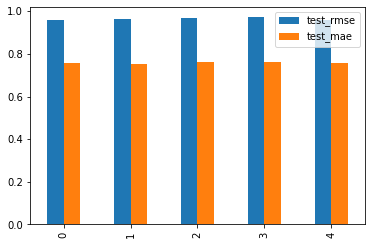

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
nmf_df.iloc[:, :2].plot(kind = 'bar')

In [47]:
from surprise.model_selection import train_test_split

In [48]:
train, test = train_test_split(data, test_size = 0.25)

In [49]:
svd.fit(train)

In [50]:
preds = svd.test(test)

In [51]:
from surprise import accuracy

In [52]:
accuracy.rmse(preds)

RMSE: 0.9375


0.9375079206941666

In [53]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = svd.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.00   {'was_impossible': False}


In [54]:
print(pred)

user: 196        item: 302        r_ui = 4.00   est = 4.00   {'was_impossible': False}


In [55]:
df.head(2)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)


In [56]:
from surprise import Reader

In [57]:
reader = Reader()

In [58]:
data = Dataset.load_from_df(df.iloc[:, :-1], reader = reader)

In [59]:
cross_validate(svd, data)

{'test_rmse': array([0.87015743, 0.87044992, 0.87912451, 0.8716767 , 0.87677201]),
 'test_mae': array([0.66956946, 0.66955971, 0.67533603, 0.66861582, 0.67254311]),
 'fit_time': (3.399387836456299,
  3.405518054962158,
  3.357675075531006,
  3.3121397495269775,
  3.3287761211395264),
 'test_time': (0.08300113677978516,
  0.14494013786315918,
  0.08025598526000977,
  0.14380311965942383,
  0.08043813705444336)}

##### Topic Models

In [60]:
seinfeld = pd.read_csv('data/scripts.csv.zip', compression = 'zip', index_col = 0)

In [61]:
seinfeld.head()

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,GEORGE,Are you through?,1.0,S01E01,1.0
3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0


In [62]:
seinfeld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54616 entries, 0 to 54615
Data columns (total 5 columns):
Character    54616 non-null object
Dialogue     54606 non-null object
EpisodeNo    54616 non-null float64
SEID         54616 non-null object
Season       54616 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [63]:
seinfeld.groupby('Season')['EpisodeNo'].count()

Season
1.0    1308
2.0    3077
3.0    6811
4.0    7290
5.0    7228
6.0    6903
7.0    7806
8.0    6897
9.0    7296
Name: EpisodeNo, dtype: int64

In [64]:
seinfeld.loc[np.random.randint(1), 'Dialogue']

'Do you know what this is all about? Do you know, why were here? To be out, this is out...and out is one of the single most enjoyable experiences of life. People...did you ever hear people talking about We should go out? This is what theyre talking about...this whole thing, were all out now, no one is home. Not one person here is home, were all out! There are people tryin to find us, they dont know where we are. (on an imaginary phone) Did you ring?, I cant find him. Where did he go? He didnt tell me where he was going. He must have gone out. You wanna go out you get ready, you pick out the clothes, right? You take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation...Then youre standing around, whatta you do? You go We gotta be getting back. Once youre out, you wanna get back! You wanna go to sleep, you wanna get up, you wanna go out again tomorrow, right? Where ever you are in life, its my feeling, youve gotta go.'

##### Topic Models

In [65]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [67]:
cvect = CountVectorizer(stop_words='english', max_features = 500, ngram_range=(1, 2))

In [68]:
X = cvect.fit_transform(seinfeld.Dialogue.dropna())

In [69]:
X.shape

(54606, 500)

In [70]:
dtm = pd.DataFrame(X.toarray(), columns = cvect.get_feature_names())

In [71]:
dtm.head()

,able,actually,ago,ah,ahead,ahh,air,alright,anybody,anymore,...,yeah know,yeah right,yeah yeah,year,years,yes,yes yes,yesterday,york,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
lda = LatentDirichletAllocation(n_components = 5)

In [73]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [74]:
import pyLDAvis

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [75]:
#!pip install pyldavis

In [76]:
import pyLDAvis.sklearn

In [77]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [78]:
print_top_words(lda, cvect.get_feature_names(), 20)

Topic #0: jerry got kramer just really okay know little car mr phone told time talk ve dont god apartment thought away
Topic #1: oh think elaine uh want don say hi let alright hello great believe come did ll door stop way night
Topic #2: know hey don good did yes just don know make maybe ah mean sure didn big ha happened like love ya
Topic #3: yeah right going gonna ll tell come gotta huh said man need new getting yeah yeah uh course got fine problem
Topic #4: like george look oh doing sorry wait guy ve just work does oh yeah boy kind coffee thing looks money feel



In [79]:
pyLDAvis.enable_notebook()

In [80]:
pyLDAvis.sklearn.prepare(lda, X, cvect)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.001389 -0.137602       1        1  22.644997
2     -0.201284  0.206333       2        1  20.810624
3      0.336859 -0.004208       3        1  19.642660
4     -0.159650 -0.244626       4        1  18.618852
1      0.022685  0.180104       5        1  18.282867, topic_info=    Category         Freq   Term        Total  loglift  logprob
489  Default  3814.000000   yeah  3814.000000  30.0000  30.0000
296  Default  4180.000000     oh  4180.000000  29.0000  29.0000
220  Default  4182.000000   know  4182.000000  28.0000  28.0000
205  Default  2880.000000  jerry  2880.000000  27.0000  27.0000
349  Default  2348.000000  right  2348.000000  26.0000  26.0000
..       ...          ...    ...          ...      ...      ...
68    Topic5   407.412048   come  1249.425662   0.5786  -4.2343
85    Topic5   364.335426    did  1443.344896   0.3226  -4.3461
244   Topic5   351.539659     ll  1879.549432   0.0227  -4.3818
87    Topic5   239.692810   didn   873.228937   0.4064  -4.7648
212   Topic5   231.469963   just  2858.431337  -0.8144  -4.7997

[287 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         1  0.017878       ah
3         2  0.976794       ah
3         4  0.001625       ah
3         5  0.003251       ah
5         1  0.996177      ahh
...     ...       ...      ...
495       5  0.001982      yes
496       2  0.994774  yes yes
498       3  0.985913     york
499       1  0.107939    youre
499       4  0.889421    youre

[462 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

In [81]:
tfidf = TfidfVectorizer()